In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy
##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [8]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
4907,00025849_037.png,Infiltration,37,25849,058Y,M,AP,3056,2544,0.139,0.139
4786,00025163_000.png,No Finding,0,25163,072Y,F,PA,2544,3056,0.139,0.139
765,00004008_000.png,No Finding,0,4008,065Y,M,PA,2816,2876,0.143,0.143


In [9]:
sample_df.shape

(5606, 11)

In [10]:
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
53415,00013490_006.png,Nodule,6,13490,43,F,PA,2990,2991,0.143,0.143,NaN
106656,00028774_008.png,No Finding,8,28774,68,F,AP,3056,2544,0.139,0.139,NaN
69296,00017106_011.png,Edema|Pneumonia,11,17106,57,M,PA,2992,2991,0.143,0.143,NaN


In [11]:
all_xray_df.shape

(112120, 12)

In [12]:
## EDA
# Todo 

all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(20)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
31507,00008232_010.png,Pneumothorax,10,8232,41,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58647,00014520_023.png,Infiltration,23,14520,32,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
93197,00023295_001.png,Infiltration|Nodule,1,23295,52,F,PA,2530,2901,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
49207,00012484_002.png,No Finding,2,12484,54,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12381,00003226_004.png,No Finding,4,3226,20,F,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
90658,00022572_040.png,Infiltration,40,22572,49,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
71554,00017629_001.png,No Finding,1,17629,57,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
45095,00011579_016.png,Atelectasis|Consolidation|Emphysema,16,11579,57,M,AP,2500,2048,0.168,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73206,00018019_017.png,Infiltration,17,18019,49,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
47022,00011985_014.png,No Finding,14,11985,54,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
all_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [14]:
all_xray_df[all_labels].sum()

Atelectasis           11559.0
Cardiomegaly           2776.0
Consolidation          4667.0
Edema                  2303.0
Effusion              13317.0
Emphysema              2516.0
Fibrosis               1686.0
Hernia                  227.0
Infiltration          19894.0
Mass                   5782.0
No Finding            60361.0
Nodule                 6331.0
Pleural_Thickening     3385.0
Pneumonia              1431.0
Pneumothorax           5302.0
dtype: float64

[Text(0, 0.5, 'Number of Images with Label')]

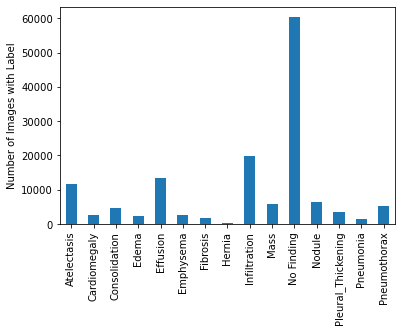

In [15]:
ax = all_xray_df[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

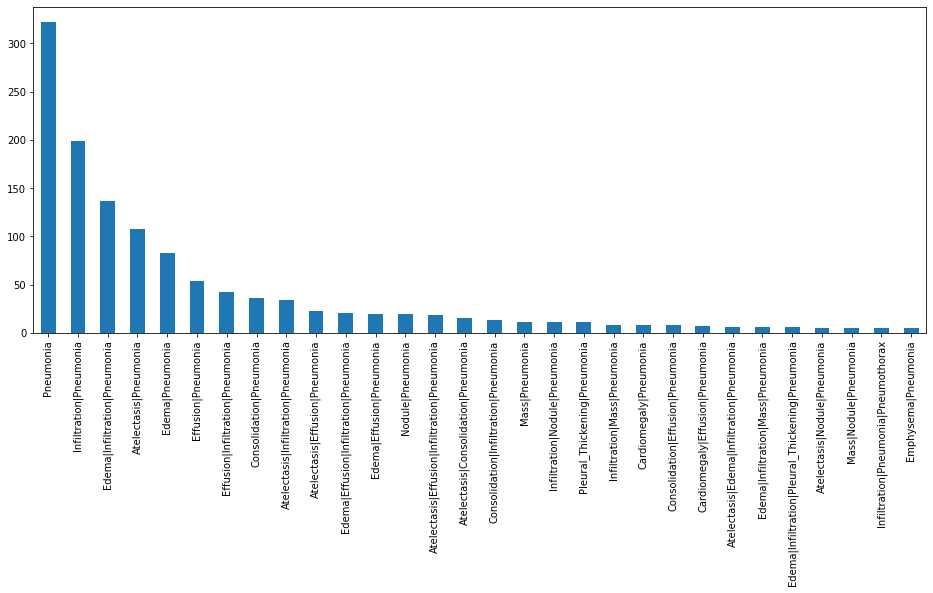

In [16]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

Most common comorbidities for Pneumonia are Infiltration,Edema, Atelectasis and Effusion. 

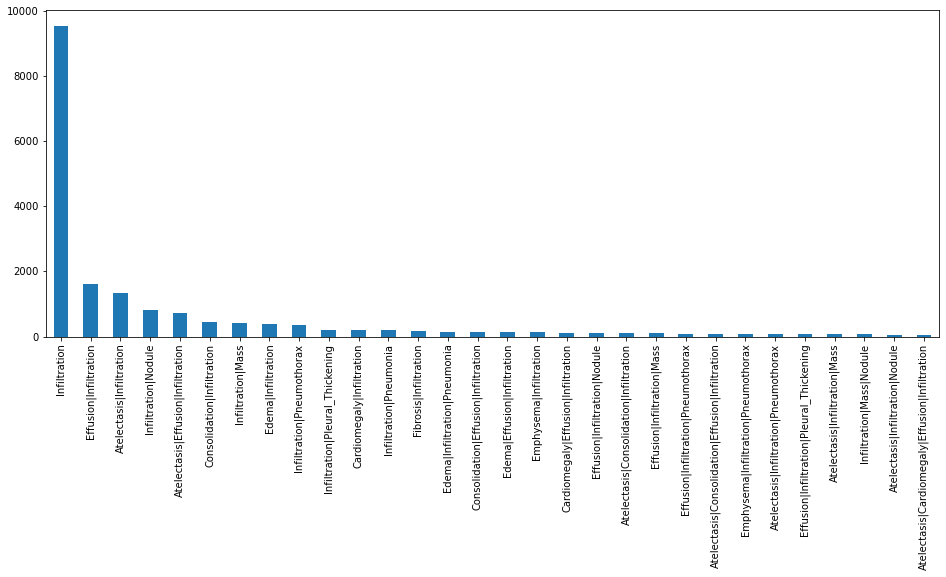

In [17]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Infiltration==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

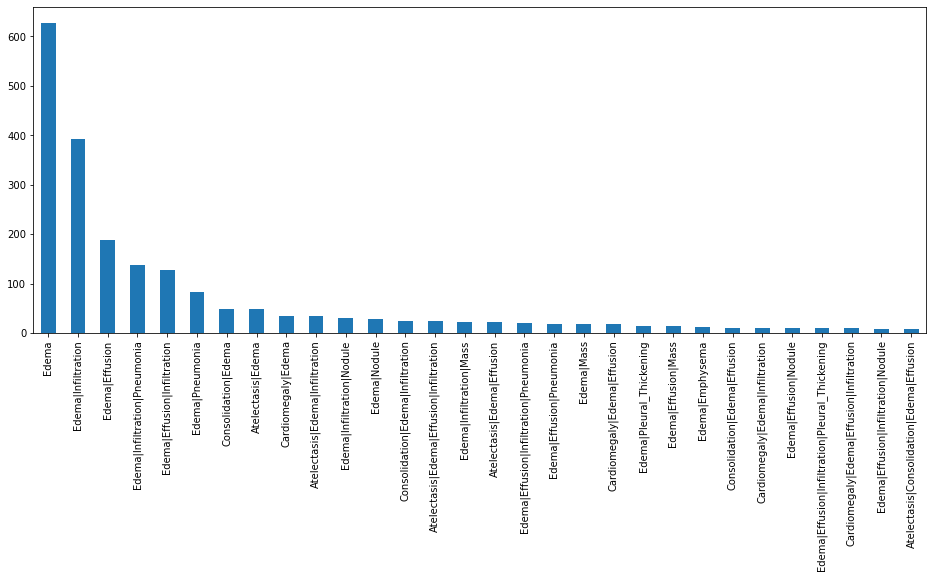

In [18]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Edema==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

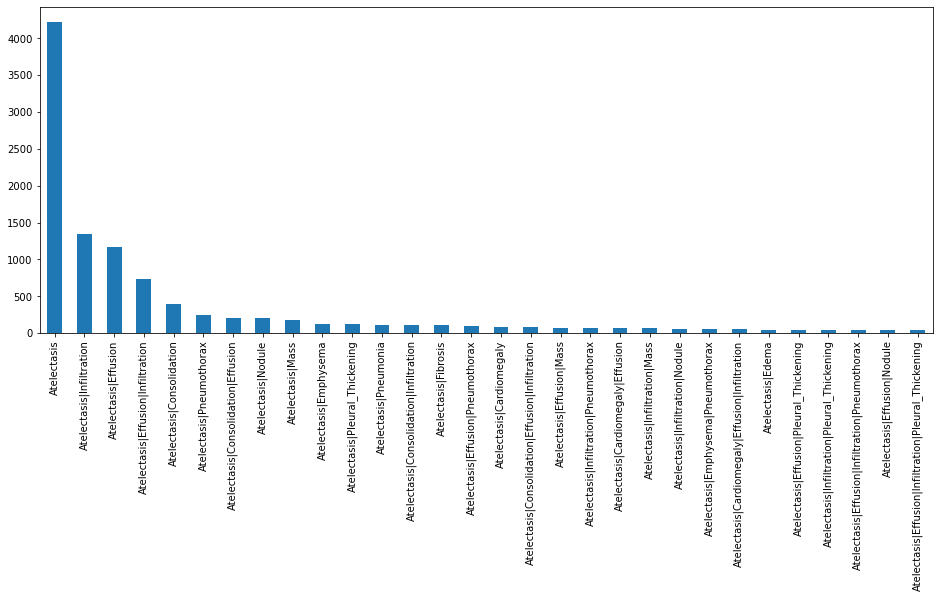

In [19]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Atelectasis==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

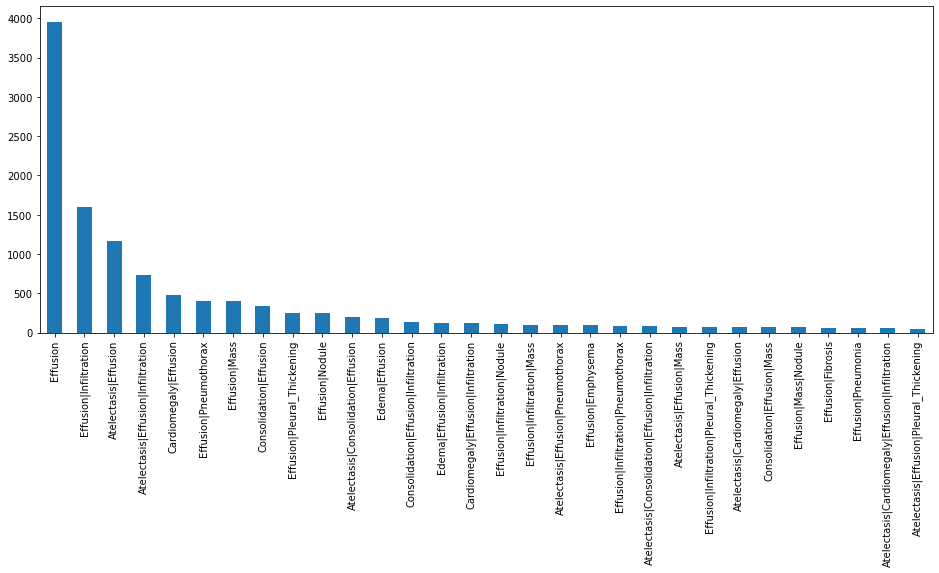

In [20]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Effusion==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

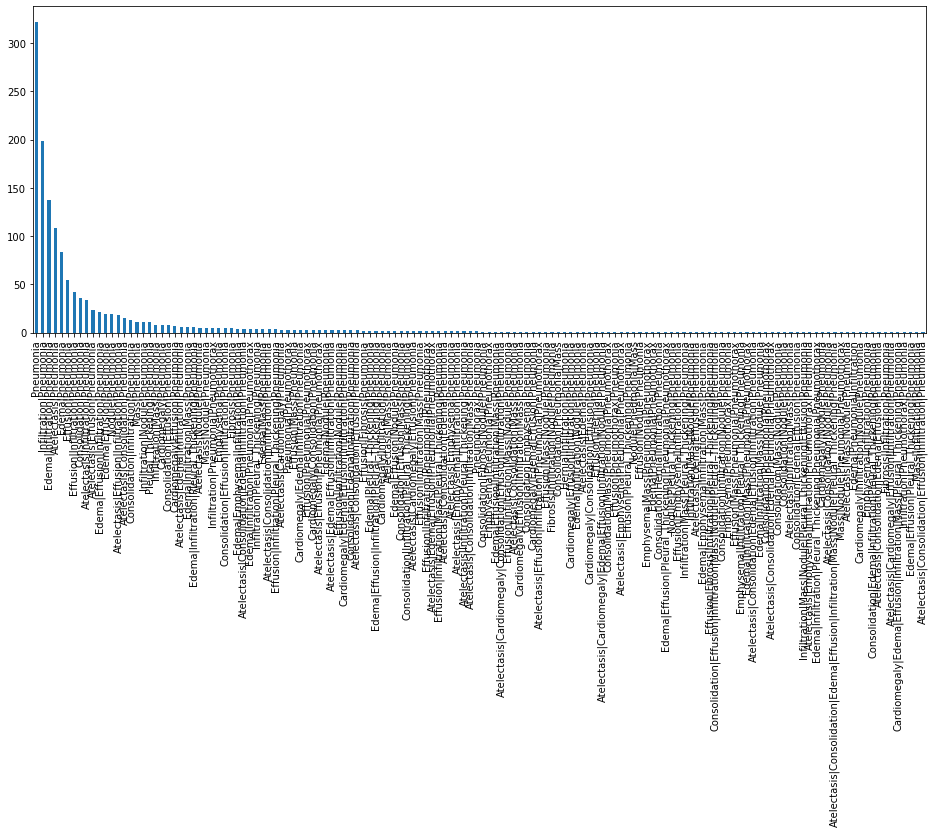

In [21]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts().plot(kind='bar')

In [22]:
a=all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()

In [23]:
type(a)

pandas.core.series.Series

In [24]:
len(a)

142

In [25]:
bins=np.linspace(10,100)

(array([ 7., 18., 20., 24., 18., 26., 20., 50., 43., 35., 36., 49., 40.,
        43., 35., 54., 39., 49., 23., 54., 52., 59., 45., 64., 29., 62.,
        65., 58., 52., 49., 34., 42., 27., 23., 10., 13.,  6.,  5.,  5.,
         4.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 10.        ,  11.83673469,  13.67346939,  15.51020408,
         17.34693878,  19.18367347,  21.02040816,  22.85714286,
         24.69387755,  26.53061224,  28.36734694,  30.20408163,
         32.04081633,  33.87755102,  35.71428571,  37.55102041,
         39.3877551 ,  41.2244898 ,  43.06122449,  44.89795918,
         46.73469388,  48.57142857,  50.40816327,  52.24489796,
         54.08163265,  55.91836735,  57.75510204,  59.59183673,
         61.42857143,  63.26530612,  65.10204082,  66.93877551,
         68.7755102 ,  70.6122449 ,  72.44897959,  74.28571429,
         76.12244898,  77.95918367,  79.79591837,  81.63265306,
         83.46938776,  85.30612245,  87.14285714,  88.97959184,
         90.81632

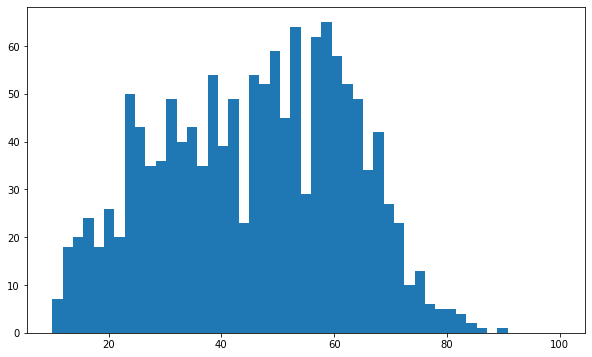

In [26]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==1]['Patient Age'],bins)

(array([7.640e+02, 7.690e+02, 1.016e+03, 1.289e+03, 1.583e+03, 2.178e+03,
        1.252e+03, 2.638e+03, 2.515e+03, 2.825e+03, 3.021e+03, 3.307e+03,
        1.661e+03, 3.503e+03, 2.863e+03, 3.348e+03, 3.629e+03, 3.968e+03,
        2.184e+03, 4.880e+03, 4.602e+03, 4.858e+03, 5.447e+03, 5.327e+03,
        2.830e+03, 5.687e+03, 5.725e+03, 4.623e+03, 4.318e+03, 4.150e+03,
        1.974e+03, 2.985e+03, 2.236e+03, 1.864e+03, 1.564e+03, 1.144e+03,
        4.530e+02, 6.020e+02, 4.760e+02, 2.690e+02, 1.170e+02, 1.390e+02,
        2.200e+01, 6.100e+01, 1.700e+01, 1.700e+01, 1.000e+00, 0.000e+00,
        0.000e+00]),
 array([ 10.        ,  11.83673469,  13.67346939,  15.51020408,
         17.34693878,  19.18367347,  21.02040816,  22.85714286,
         24.69387755,  26.53061224,  28.36734694,  30.20408163,
         32.04081633,  33.87755102,  35.71428571,  37.55102041,
         39.3877551 ,  41.2244898 ,  43.06122449,  44.89795918,
         46.73469388,  48.57142857,  50.40816327,  52.24489796,
   

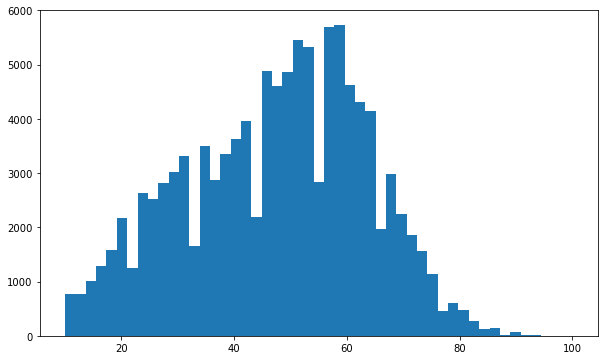

In [27]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df['Patient Age'],bins)

General age distribution for total population and for Pneumonia looks similar. Also the Pneumonia cases peak at around age of 60

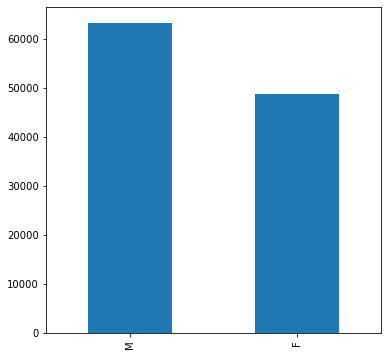

In [28]:

plt.figure(figsize=(6,6))
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

In [29]:
all_xray_df['Patient Gender'].value_counts()

M    63340
F    48780
Name: Patient Gender, dtype: int64

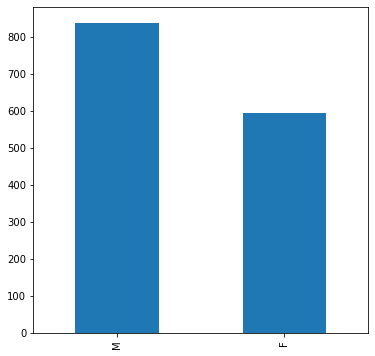

In [30]:
plt.figure(figsize=(6,6))
all_xray_df[all_xray_df.Pneumonia ==1]['Patient Gender'].value_counts().plot(kind='bar')

Gender distribution is towards male for Pneunomia and overall population

In [31]:
all_xray_df[all_xray_df.Pneumonia ==1]['Patient Gender'].value_counts()

M    838
F    593
Name: Patient Gender, dtype: int64

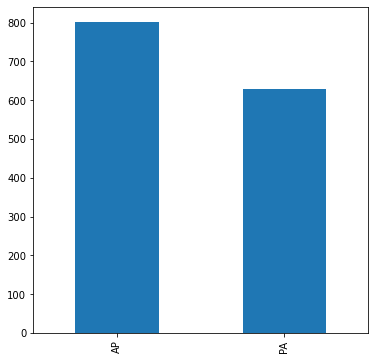

In [32]:
plt.figure(figsize=(6,6))
all_xray_df[all_xray_df.Pneumonia ==1]['View Position'].value_counts().plot(kind='bar')

In [33]:
all_xray_df[all_xray_df.Pneumonia ==1]['View Position'].value_counts()

AP    801
PA    630
Name: View Position, dtype: int64

From clinical standpoints PA views give better information compared to AP views.

In [34]:
all_xray_df[all_xray_df.Pneumonia ==1]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
48,00000013_010.png,Effusion|Pneumonia|Pneumothorax,10,13,60,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
126,00000032_012.png,Atelectasis|Consolidation|Edema|Pneumonia,12,32,55,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
253,00000056_000.png,Nodule|Pneumonia,0,56,76,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
276,00000061_012.png,Edema|Effusion|Infiltration|Pleural_Thickening...,12,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
279,00000061_015.png,Pneumonia,15,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111557,00030536_007.png,Atelectasis|Consolidation|Pneumonia,7,30536,56,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111627,00030570_001.png,Edema|Infiltration|Pneumonia,1,30570,29,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
111767,00030621_002.png,Pneumonia,2,30621,22,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111845,00030637_016.png,Consolidation|Pneumonia,16,30637,48,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
len(all_xray_df[all_xray_df.Pneumonia ==1])

1431

In [36]:
len(all_xray_df[all_xray_df.Pneumonia ==0])

110689

Pneumonia cases: 1431
Non-Pneumonia cases: 110689

# Number of diseases per patient

In [37]:
df=all_xray_df[all_xray_df.Pneumonia ==1].copy()

In [38]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
48,00000013_010.png,Effusion|Pneumonia|Pneumothorax,10,13,60,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
126,00000032_012.png,Atelectasis|Consolidation|Edema|Pneumonia,12,32,55,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
253,00000056_000.png,Nodule|Pneumonia,0,56,76,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
276,00000061_012.png,Edema|Effusion|Infiltration|Pleural_Thickening...,12,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
279,00000061_015.png,Pneumonia,15,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111557,00030536_007.png,Atelectasis|Consolidation|Pneumonia,7,30536,56,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111627,00030570_001.png,Edema|Infiltration|Pneumonia,1,30570,29,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
111767,00030621_002.png,Pneumonia,2,30621,22,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111845,00030637_016.png,Consolidation|Pneumonia,16,30637,48,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
df['No. of diseases']=df[all_labels].sum(axis=1)

In [40]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,No. of diseases
48,00000013_010.png,Effusion|Pneumonia|Pneumothorax,10,13,60,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
126,00000032_012.png,Atelectasis|Consolidation|Edema|Pneumonia,12,32,55,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
253,00000056_000.png,Nodule|Pneumonia,0,56,76,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
276,00000061_012.png,Edema|Effusion|Infiltration|Pleural_Thickening...,12,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0
279,00000061_015.png,Pneumonia,15,61,77,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


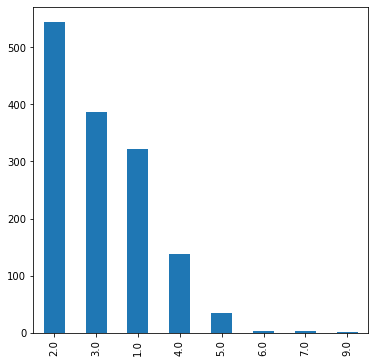

In [41]:
plt.figure(figsize=(6,6))
df['No. of diseases'].value_counts().plot(kind='bar')

Existence of pneumonia along with more 1 or 2 diseases is more than just pneumonia

[Text(0, 0.5, 'Number of Images with Label')]

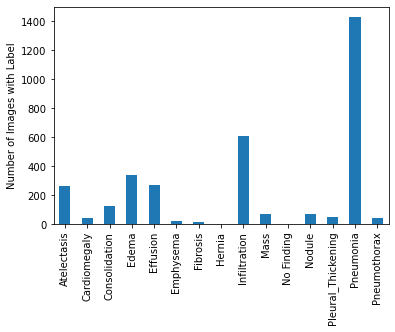

In [42]:
ax = df[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

# Pixel Level Assesment


In [43]:
from glob import glob
paths_img = {os.path.basename(c): c for c in glob(os.path.join('/data','images*', '*', '*.png'))}
sample_df['path_img'] = sample_df['Image Index'].map(paths_img.get)

In [44]:
sample_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path_img
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139000,0.139000,/data/images_001/images/00000013_005.png
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168000,0.168000,/data/images_001/images/00000013_026.png
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000,/data/images_001/images/00000017_001.png
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143000,0.143000,/data/images_001/images/00000030_001.png
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168000,0.168000,/data/images_001/images/00000032_001.png
...,...,...,...,...,...,...,...,...,...,...,...,...
5601,00030712_000.png,No Finding,0,30712,058Y,M,PA,2021,2021,0.194311,0.194311,/data/images_012/images/00030712_000.png
5602,00030786_005.png,Cardiomegaly|Effusion|Emphysema,5,30786,061Y,F,AP,3056,2544,0.139000,0.139000,/data/images_012/images/00030786_005.png
5603,00030789_000.png,Infiltration,0,30789,052Y,F,PA,2021,2021,0.194311,0.194311,/data/images_012/images/00030789_000.png
5604,00030792_000.png,No Finding,0,30792,010Y,F,PA,1775,1712,0.194311,0.194311,/data/images_012/images/00030792_000.png


In [56]:
hist = sample_df[sample_df["Finding Labels"].str.match('Pneumonia')]
data = []
for p in range(9):
    data.append(("pneumonia", hist.iloc[p]["path_img"]))

In [60]:
len(hist)

14

In [57]:
data

[('pneumonia', '/data/images_004/images/00008470_008.png'),
 ('pneumonia', '/data/images_006/images/00011702_043.png'),
 ('pneumonia', '/data/images_006/images/00012158_025.png'),
 ('pneumonia', '/data/images_006/images/00012667_000.png'),
 ('pneumonia', '/data/images_006/images/00012733_000.png'),
 ('pneumonia', '/data/images_007/images/00014201_008.png'),
 ('pneumonia', '/data/images_008/images/00017714_019.png'),
 ('pneumonia', '/data/images_009/images/00019021_001.png'),
 ('pneumonia', '/data/images_009/images/00019865_013.png')]

In [61]:
data[i][1]

'/data/images_009/images/00019865_013.png'

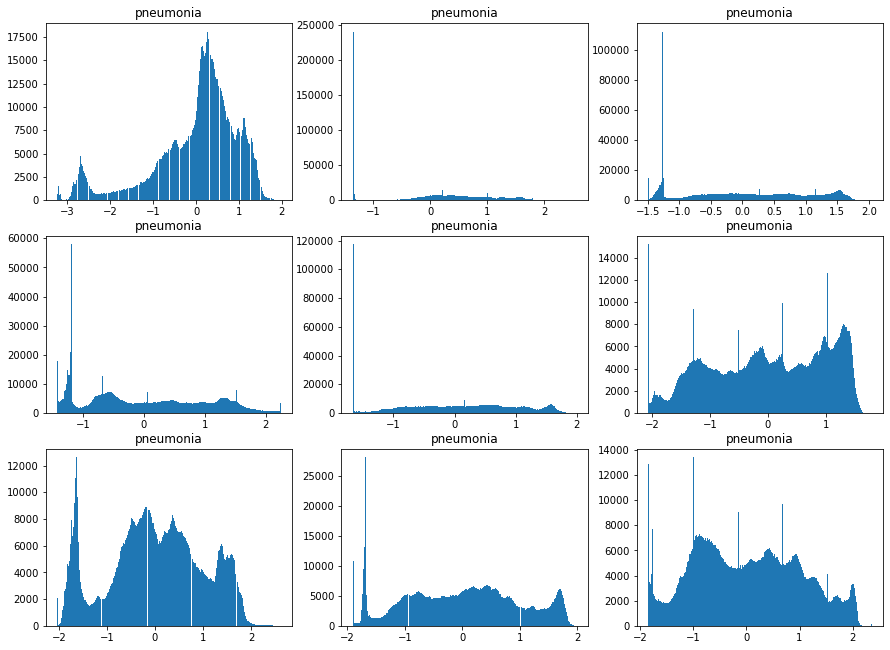

In [58]:
plt.figure(figsize=(15, 15))
columns = 3
for i in range(len(data) ): 
    plt.subplot(len(data) / columns + 1, columns, i + 1).set_title('pneumonia')    
    var = plt.imread(data[i][1])   
    plt.hist(((var - np.mean(var))/np.std(var)).ravel(), bins=250)

In [62]:
hist = sample_df[sample_df["Finding Labels"].str.match('Infiltration')]
data = []
for p in range(9):
    data.append(("infiltration", hist.iloc[p]["path_img"]))

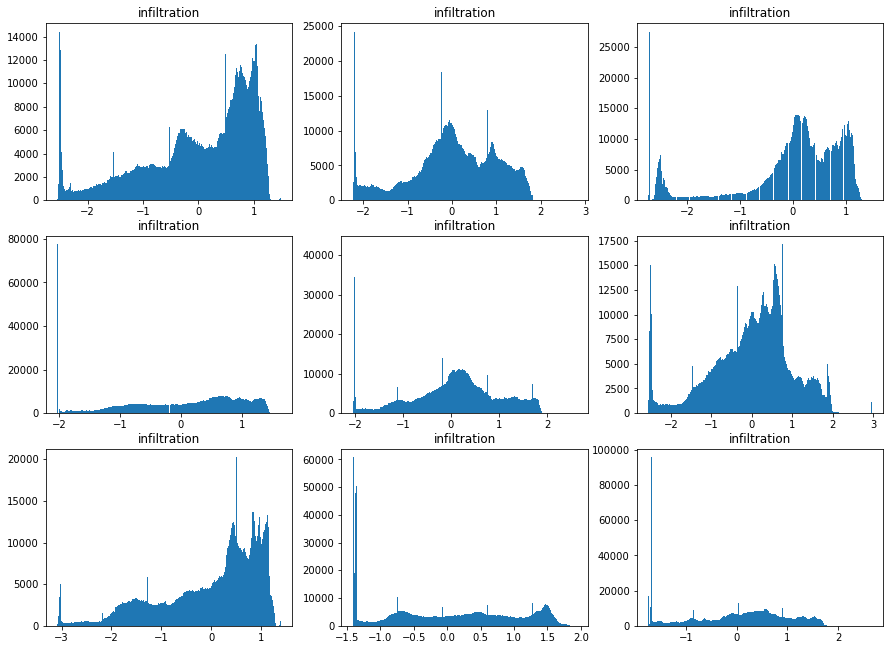

In [63]:
plt.figure(figsize=(15, 15))
columns = 3
for i in range(len(data) ): 
    plt.subplot(len(data) / columns + 1, columns, i + 1).set_title('infiltration')    
    var = plt.imread(data[i][1])   
    plt.hist(((var - np.mean(var))/np.std(var)).ravel(), bins=250)